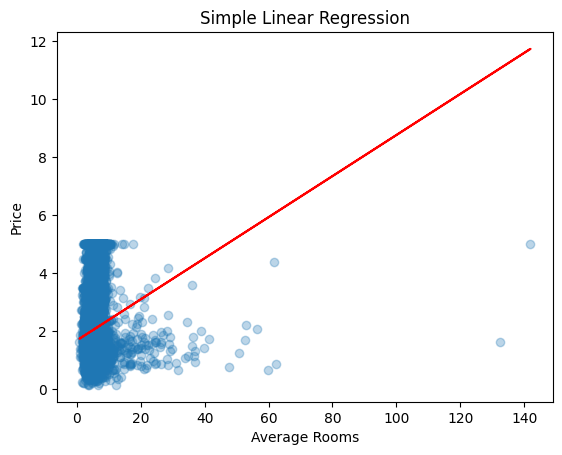

In [1]:

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Using only one feature
X = df[['AveRooms']]
y = df['target']

model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)

plt.scatter(X, y, alpha=0.3)
plt.plot(X, pred, color='red')
plt.xlabel("Average Rooms")
plt.ylabel("Price")
plt.title("Simple Linear Regression")
plt.show()


In [ ]:

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = df.drop('target', axis=1)
y = df['target']

model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)

r2 = r2_score(y, pred)
mse = mean_squared_error(y, pred)
rmse = np.sqrt(mse)

print("R2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("Coefficients:", model.coef_)


In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)
pred_scaled = model_scaled.predict(X_scaled)

r2_scaled = r2_score(y, pred_scaled)
print("R2 after scaling:", r2_scaled)


In [ ]:

import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Discussion (not code)
print("Features with highest correlation to target:", corr['target'].sort_values(ascending=False).head())
print("Multicollinearity can inflate coefficients and cause instability.")


In [ ]:

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

print("Accuracy:", accuracy_score(ytest, ypred))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
print("Classification Report:\n", classification_report(ytest, ypred))
print("ROC AUC:", roc_auc_score(ytest, model.predict_proba(Xtest)[:,1]))


In [ ]:

from sklearn.metrics import f1_score

probs = model.predict_proba(Xtest)[:, 1]
thresholds = [0.3, 0.5, 0.7]

for t in thresholds:
    pred_thresh = (probs >= t).astype(int)
    print(f"\nThreshold = {t}")
    print("Conf Matrix:\n", confusion_matrix(ytest, pred_thresh))
    print("F1 Score:", f1_score(ytest, pred_thresh))


In [ ]:

fpr, tpr, thresh = roc_curve(ytest, probs)
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:

from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(multi_class='ovr', max_iter=200)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

print("Accuracy:", accuracy_score(ytest, ypred))
print("Classification Report:\n", classification_report(ytest, ypred))


In [ ]:

# 1. Linear regression assumes linearity, no multicollinearity, homoscedasticity, and normality of errors.
# 2. Logistic regression is used when the output is categorical, like 0 or 1.
# 3. Coefficients in logistic regression show the log odds of the event occurring.
# 4. Sigmoid is used in binary classification, softmax in multiclass. Both convert scores to probabilities.
# 5. R-squared is not used in logistic regression because it's based on squared errors, not classification.
